# Decision Tree Models
The Decision Tree model can be used to discover complex linear relationships between variables for either prediction, binary classification or multi-output classification. In the first example of a decision tree algorithm, I have opted to examine a commonly used dataset which is freely available in Sci-kit Learn. The following example will continue with the 'price prediction' theme with relatively few features.

The first step involves importing the relevant packages and the Iris dataset.

In [1]:
%matplotlib inline

In [24]:
from sklearn import tree
from sklearn.datasets import load_wine

wine = load_wine()
X = wine.data[:, 0:10]
y = wine.target

dtc = tree.DecisionTreeClassifier(max_depth=None)
dtc = dtc.fit(X, y)

Using the plot_tree() method within the DecisionTreeClassifier model and setting the 'filled' attribute to 'True' will color the tree nodes explaining the majority class at each decision point in the tree.

[Text(131.52857142857144, 195.696, 'X[9] <= 3.82\ngini = 0.658\nsamples = 178\nvalue = [59, 71, 48]'),
 Text(47.82857142857143, 152.208, 'X[0] <= 13.02\ngini = 0.117\nsamples = 64\nvalue = [4, 60, 0]'),
 Text(23.914285714285715, 108.72, 'gini = 0.0\nsamples = 55\nvalue = [0, 55, 0]'),
 Text(71.74285714285715, 108.72, 'X[4] <= 95.0\ngini = 0.494\nsamples = 9\nvalue = [4, 5, 0]'),
 Text(47.82857142857143, 65.232, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(95.65714285714286, 65.232, 'X[9] <= 3.345\ngini = 0.32\nsamples = 5\nvalue = [4, 1, 0]'),
 Text(71.74285714285715, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(119.57142857142857, 21.744, 'gini = 0.0\nsamples = 4\nvalue = [4, 0, 0]'),
 Text(215.22857142857143, 152.208, 'X[6] <= 1.58\ngini = 0.581\nsamples = 114\nvalue = [55, 11, 48]'),
 Text(167.4, 108.72, 'X[2] <= 2.06\ngini = 0.04\nsamples = 49\nvalue = [0, 1, 48]'),
 Text(143.4857142857143, 65.232, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(191.314

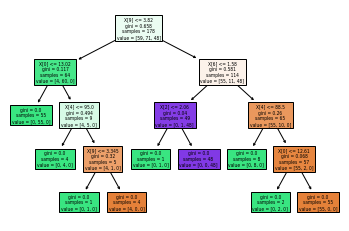

In [25]:
tree.plot_tree(dtc, filled=True)

The visualization of this tree plot can be tidied up using matplotlib:

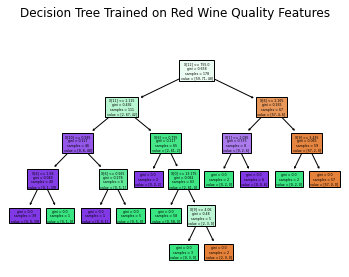

In [29]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure()
dtc = tree.DecisionTreeClassifier().fit(wine.data, wine.target)
plot_tree(dtc, filled=True)
plt.title("Decision Tree Trained on Red Wine Quality Features\n\n")
plt.show()

Repeating the training process but only displaying the 'max_depth' in the classifier to a value of 2 (a depth of 2 levels from the root node):

[Text(141.64615384615385, 190.26, 'X[9] <= 3.82\ngini = 0.658\nsamples = 178\nvalue = [59, 71, 48]'),
 Text(51.50769230769231, 135.9, 'X[9] <= 3.46\ngini = 0.117\nsamples = 64\nvalue = [4, 60, 0]'),
 Text(25.753846153846155, 81.53999999999999, 'gini = 0.0\nsamples = 55\nvalue = [0, 55, 0]'),
 Text(77.26153846153846, 81.53999999999999, 'X[6] <= 2.32\ngini = 0.494\nsamples = 9\nvalue = [4, 5, 0]'),
 Text(51.50769230769231, 27.180000000000007, '\n  (...)  \n'),
 Text(103.01538461538462, 27.180000000000007, '\n  (...)  \n'),
 Text(231.7846153846154, 135.9, 'X[6] <= 1.58\ngini = 0.581\nsamples = 114\nvalue = [55, 11, 48]'),
 Text(180.27692307692308, 81.53999999999999, 'X[2] <= 2.06\ngini = 0.04\nsamples = 49\nvalue = [0, 1, 48]'),
 Text(154.52307692307693, 27.180000000000007, '\n  (...)  \n'),
 Text(206.03076923076924, 27.180000000000007, '\n  (...)  \n'),
 Text(283.2923076923077, 81.53999999999999, 'X[4] <= 88.5\ngini = 0.26\nsamples = 65\nvalue = [55, 10, 0]'),
 Text(257.53846153846155, 2

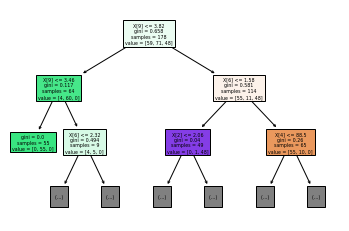

In [30]:
from sklearn import tree
from sklearn.datasets import load_iris

wine = load_wine()
X = wine.data[:, 0:10]
y = wine.target

dtc = tree.DecisionTreeClassifier(max_depth=None)
dtc = dtc.fit(X, y)
tree.plot_tree(dtc, max_depth=2, filled=True)

## Using Graphviz
This method can be used as an alternative way to display the decision tree.

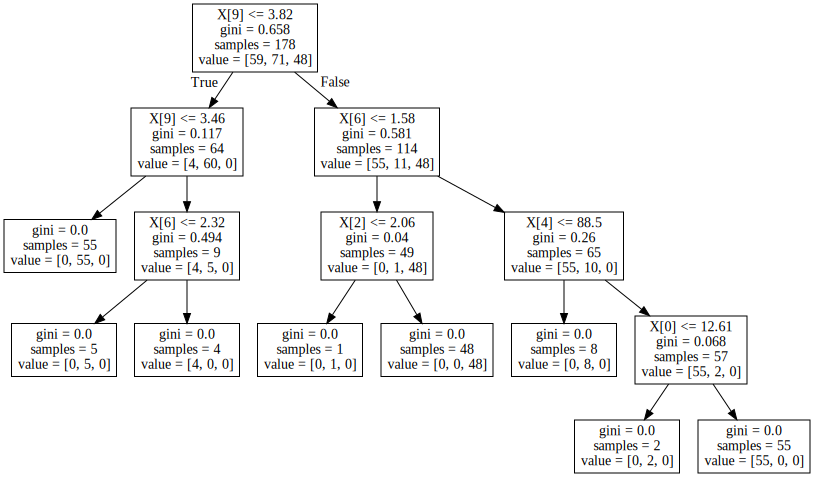

In [64]:
from sklearn.tree import export_graphviz

image_path='C:/Users/lynst/Documents/GitHub/machine-learning-projects/machine-learning/wine_tree.dot'
export_graphviz(dtc, 
                out_file=image_path,
                feature_names=wine.feature_names[0:10],
                class_names=wine.target_names,
                rounded=True,
                special_characters=True,
                filled=True
               )

graph = graphviz.Source(dot_data)
graph

Converting the dot file to a png file requires a stand-alone installation of graphviz, or a pip installation.

In [60]:
!dot -Tpng wine_tree.dot -o wine_tree.png

In [ ]:
! dot -Tpng iris_tree.dot -o iris_tree.png

In [67]:
from Ipython.display import Image
Image(filename="wine_tree.png")

ModuleNotFoundError: No module named 'Ipython'

![iris_tree.png](attachment:iris_tree.png)A Decision Tree based on the Iris dataset

# Decision Tree Model Selection
Next, it's time to apply a Decision Tree model to the entire dataset before seeking further improvement.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# select data for modeling
X = df[["Open", "High", "Low", "Volume"]]
y = df["Close"]

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X, y)

In [ ]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# predict
y_pred = tree_reg.predict(X_train)

Now trying a prediction on the working linear model (first 5 values):

In [ ]:
print(y_pred[:5])

Measuring the RMSE and r-squared score for the linear model (based on training set):

In [ ]:
y_pred = tree_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, y_pred)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)
    
r2_train = r2_score(y_train, y_pred)
print(r2_train)

This definitely appears to be overfitting with perfect scores for both RMSE and r-squared. Let's see if there is a different outcome for the test data.

In [ ]:
y_pred = tree_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)
    
r2_test = r2_score(y_test, y_pred)
print(r2_test)

This appears unlikely also. In order to establish a more likely outcome I will try dividing the dataframe into several smaller training and validation sets and perform the decision tree analysis on each. This is done using K-Fold Cross Validation.

## Cross Validation
This method will evaluate the Decsion Tree model by splitting the training set into several smaller training and validation sets for training and evaluation separately. This is achieved by using the K-fold cross validation technique and I have split the data into 10 separate folds, cv=10 (which can be changed).

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
r2_test = r2_score(y_test, y_pred)
                         
def display_scores(scores):
    print("Scores:", scores)
    print("Mean", scores.mean())
    print("Standard Deviation", scores.std())
    print("R-Squared:", r2_test)
          
display_scores(tree_rmse_scores)

Comparing the scores from cross validation to those from the linear regression model:

In [ ]:
lin_scores = cross_val_score(lin_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

# Random Forest Model Selection
Next I will try the Random Forest Regressor model to try and improve on these scores and their accuracy. Using a Random Forest model should provide a more accurate prediction because it's an aggregate of several individual decision tree models.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X, y)

In [ ]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# predict
y_pred = forest_reg.predict(X_train)

Now trying a prediction on the working linear model (first 5 values):

In [ ]:
print(y_pred[:5])

Measuring the RMSE and r-squared score for the linear model (based on training set):

In [ ]:
y_pred = forest_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, y_pred)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

r2_train = r2_score(y_train, y_pred)
print(r2_train)

In [ ]:
y_pred = forest_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

r2_test = r2_score(y_test, y_pred)
print(r2_test)

This generalizes well with the test set data but I aim to use the cross-validation method one more time.

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(forest_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
r2_test = r2_score(y_test, y_pred)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean", scores.mean())
    print("Standard Deviation", scores.std())
    print("R-Squared:", r2_test)
          
display_scores(tree_rmse_scores)

So the cross validation appears to have reduced the standard deviation considerably using the random forest ensemble method. Once again, I am comparing the scores from cross validation to those from the linear regression model as follows:

In [ ]:
lin_scores = cross_val_score(lin_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

So evaluating each of the 10 subsets using K-Folds Cross Validation has produced the most accurate score and lowest margin of error so far.

Saving the file as a pickle file will ensure some consistency when comparing scores, parameters and hyperparameters and enable me to start where I left off!

I first need import pickle and joblib.

In [ ]:
# pickle file to go here

# Print Dependencies
Dependences are fundamental to record the **computational environment**.   

- Use [watermark](https://github.com/rasbt/watermark) to print version of python, ipython, and packages, and characteristics of the computer

In [ ]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p wget,pandas,numpy,watermark,tarfile,urllib3,matplotlib,seaborn,sklearn 

# date
print (" ")
%watermark -u -n -t -z 